<a href="https://colab.research.google.com/github/mariacmartins/teste_pratico_olist/blob/main/Desafio_Olist_Vaga_Data_Scientist_Jr_Maria_Clara_Martins_Ferreira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Teste prático**

Desafio técnico para a vaga de Data Scientist Jr tendo como objetivo principal compreender melhor o cenário do **e-commerce brasileiro** com base nos dados disponibilizados pela **Olist**. A tarefa consistiu em realizar uma análise descritiva e também exploratória nos datasets de pedidos e produtos, a partir de base de dados em formato CSV.
![](https://storage.googleapis.com/kaggle-datasets-images/55151/105464/d59245a7014a35a35cc7f7b721de4dae/dataset-cover.png?t=2018-09-21-16-21-21)

In [ ]:
#importações necessárias para a realização do desafio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#leitura dos datasets disponibilizados pela Olist em formato csv via pandas
df_orders = pd.read_csv('https://raw.githubusercontent.com/mariacmartins/teste_pratico_olist/main/Datasets%20Teste%20Data%20Scientist/olist_orders.csv')
df_products = pd.read_csv('https://raw.githubusercontent.com/mariacmartins/teste_pratico_olist/main/Datasets%20Teste%20Data%20Scientist/olist_products.csv')
df_variables = pd.read_csv('https://raw.githubusercontent.com/mariacmartins/teste_pratico_olist/main/Datasets%20Teste%20Data%20Scientist/olist_variables_description.csv')


### **Análises exploratórias inciais:** Entendendo a estrutura e o conteúdo disponível nos dataframes

In [ ]:
df_orders.head(3)

,order_id,product_id,seller_id,customer_id,price,freight_value,order_delivered_customer_date,order_estimated_delivery_date,seller_city,seller_state,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,58.9,13.29,2017-09-20 23:43:48,2017-09-29 00:00:00,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,239.9,19.93,2017-05-12 16:04:24,2017-05-15 00:00:00,sao paulo,SP,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,199.0,17.87,2018-01-22 13:19:16,2018-02-05 00:00:00,borda da mata,MG,para de minas,MG


In [ ]:
df_products.head(3)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer


In [ ]:
df_variables.head()

,Variável,Dataset,Descrição
0,order_id,olist_orders,Identificador único do pedido
1,product_id,olist_orders,Identificador único do produto
2,seller_id,olist_orders,Identificador único do vendedor
3,customer_id,olist_orders,Identificador único do cliente
4,price,olist_orders,Preço do item


In [ ]:
df_orders.describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


A fim de obter informações e *insights* sobre os produtos e as categorias disponíveis nos dados disponibilizados, iniciei a análise exploratória do dataset olist_products

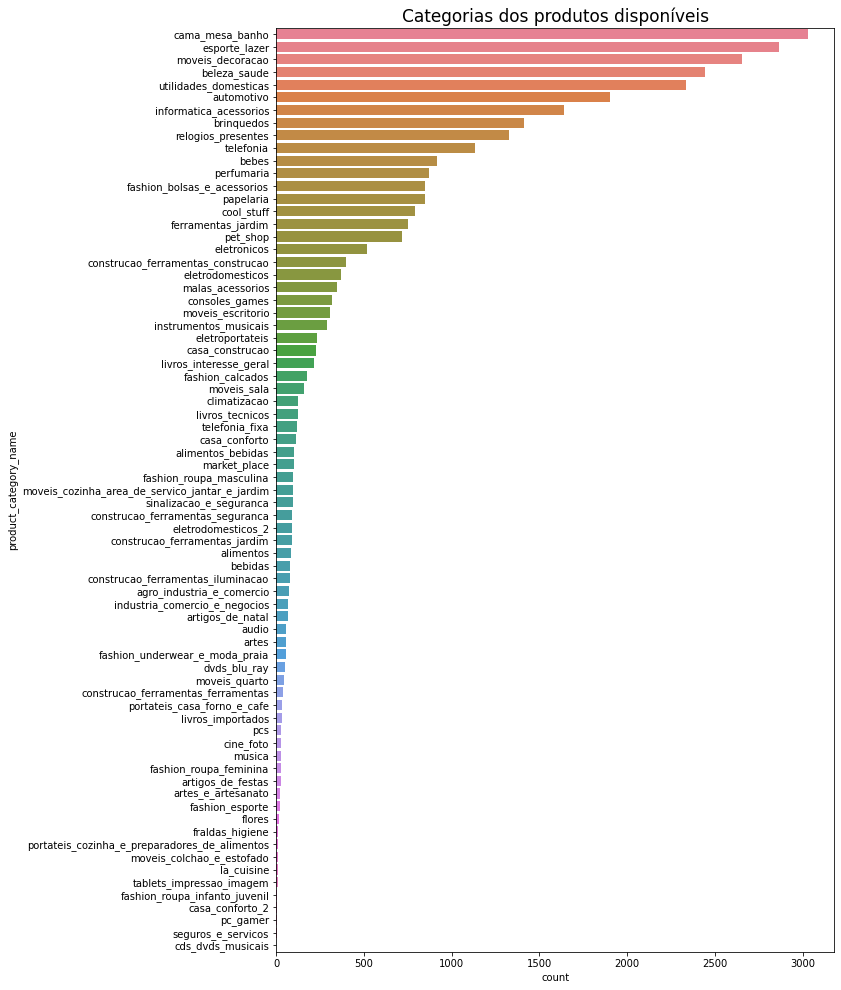

In [ ]:
#Geração do gráfico de categorias gerais dos produtos disponíveis
plt.subplots(figsize=(10,17))

category_available = sns.countplot(y='product_category_name', 
    data=df_products, 
    palette='husl', 
    order=df_products['product_category_name'].value_counts().index).set_title("Categorias dos produtos disponíveis", fontsize=17)


**Merge** dos dataframes df_orders + df_products com o objetivo de realizar análises mais completas

In [ ]:
df_orders_products = pd.merge(df_orders, df_products, how='left')
df_orders_products.head()

,order_id,product_id,seller_id,customer_id,price,freight_value,order_delivered_customer_date,order_estimated_delivery_date,seller_city,seller_state,customer_city,customer_state,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,58.90,13.29,2017-09-20 23:43:48,2017-09-29 00:00:00,volta redonda,SP,campos dos goytacazes,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,239.90,19.93,2017-05-12 16:04:24,2017-05-15 00:00:00,sao paulo,SP,santa fe do sul,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,199.00,17.87,2018-01-22 13:19:16,2018-02-05 00:00:00,borda da mata,MG,para de minas,MG,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,12.99,12.79,2018-08-14 13:32:39,2018-08-20 00:00:00,franca,SP,atibaia,SP,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,199.90,18.14,2017-03-01 16:42:31,2017-03-17 00:00:00,loanda,PR,varzea paulista,SP,ferramentas_jardim


In [ ]:
#Organização dos dados para visualização das 10 categorias de produtos mais vendidos
most_product = df_orders_products.groupby('product_category_name').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'}).sort_values(by='order_count', ascending=False).reset_index()
most_product.head()

,product_category_name,order_count
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827


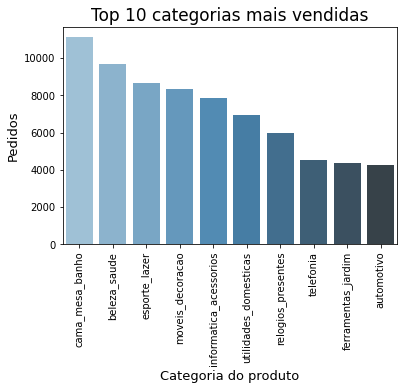

In [ ]:
# Visualizando as 10 categorias de produto mais vendidos:
sns.barplot(x='product_category_name', y='order_count', data=most_product[:10], palette='Blues_d')

plt.xlabel("Categoria do produto", fontsize=13)
plt.ylabel("Pedidos", fontsize=13)
plt.title('Top 10 categorias mais vendidas', fontsize=17)
plt.xticks(rotation='vertical')
plt.show()



Visto que a Melhor Envio tem preocupações de negócios intimamente relacionadas com questões como **fretes e valores de preço de envio de produtos**, realizei análises relacionando categorias de produtos associadas ao maiores valores de frete.

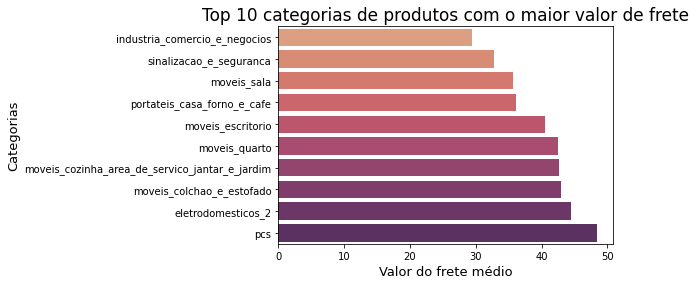

In [ ]:
#Visualização gráfica das Top 10 categorias de produtos com o maior valor de frete associado, utilizando parâmetros como valor do frete médio
highest_freight_category = df_orders_products.groupby('product_category_name')["freight_value"].agg(np.mean).sort_values().tail(10)

sns.barplot(y=highest_freight_category.index, x=highest_freight_category.values, palette='flare')
plt.title('Top 10 categorias de produtos com o maior valor de frete',fontsize=17);
plt.xlabel('Valor do frete médio',fontsize=13);
plt.ylabel('Categorias',fontsize=13);



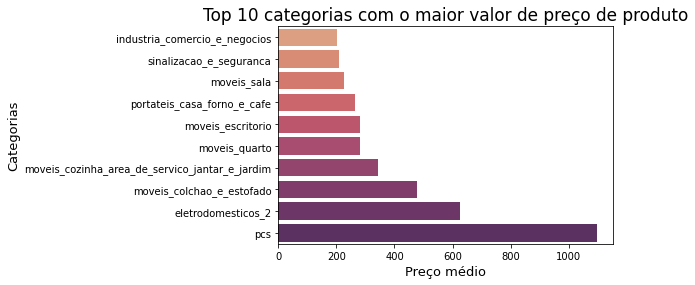

In [ ]:
#Visualização gráfica das Top 10 categorias de produtos com os maiores valores de preço de produto
highest_price_category = df_orders_products.groupby('product_category_name')["price"].agg(np.mean).sort_values().tail(10)

sns.barplot(y=highest_freight_category.index, x=highest_price_category.values, palette='flare')
plt.title('Top 10 categorias com o maior valor de preço de produto',fontsize=17);
plt.xlabel('Preço médio',fontsize=13);
plt.ylabel('Categorias',fontsize=13);

É possível observar nos gráficos anteriores, que produtos de grande valor associados (ex.: pcs) também possuem fretes de maior valor médio. Mas um fato interessante a ser observado, é que móveis de maneira geral, aparecem frequentemente nos dois gráficos (preço de produtos e frete). Cabe lembrar que geralmente, móveis são objetos grandes a serem enviados. Isso demonstra que tamanho e peso também contribuem no aumento de valor do frete. 

### **Análises em relação à origens e destinos de produtos e impacto do frete no valor final dos pedidos:**

Text(0, 0.5, 'Vendedores')

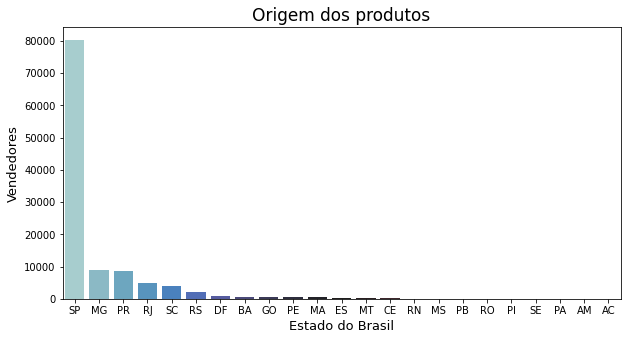

In [ ]:
#Visualização gráfica da Origem dos produtos. Para isso, utilizei dados de seller_state (vendedores).
plt.subplots(figsize=(10,5))
count_seller_state = sns.countplot(x='seller_state', 
    data=df_orders, 
    palette='icefire', 
    order=df_orders['seller_state'].value_counts().index).set_title("Origem dos produtos", fontsize=17)
plt.xlabel("Estado do Brasil", fontsize=13)
plt.ylabel("Vendedores", fontsize=13)

Text(0, 0.5, 'Clientes')

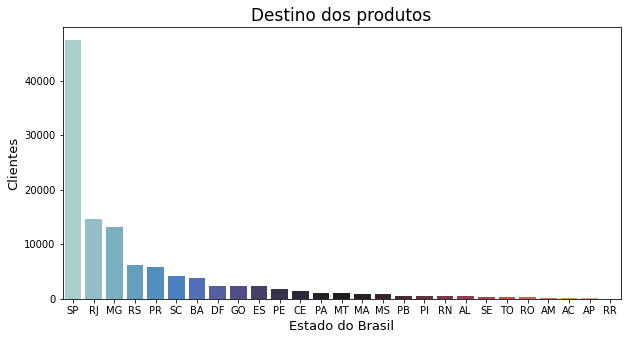

In [ ]:
#Visualização gráfica do Destino dos produtos. Para isso, utilizei dados de customer_state (clientes).
plt.subplots(figsize=(10,5))

count_customer_state = sns.countplot(x='customer_state', 
    data=df_orders, 
    palette='icefire', 
    order=df_orders['customer_state'].value_counts().index).set_title("Destino dos produtos", fontsize=17)
plt.xlabel("Estado do Brasil", fontsize=13)
plt.ylabel("Clientes", fontsize=13)


Os Estados do Brasil que concentram o maior número de vendedores, e consequentemente, a maior origem dos produtos vendidos são: SP, MG, PR e RJ. Já os Estados que concentram o maior número de clientes são: SP, RJ, MG e RS. Esses dados demostram que o fluxo de vendas e compras por e-commerce via Olist está mais concentrado nas regiões sudeste e sul do Brasil, com destaque para o Estado de SP.

A fim de entender de que modo essa dispersão geográfica impacta o valor dos fretes, gerei um boxplot utilizando dados como customer_state (Estado do cliente) e freight_value (valor do frete):

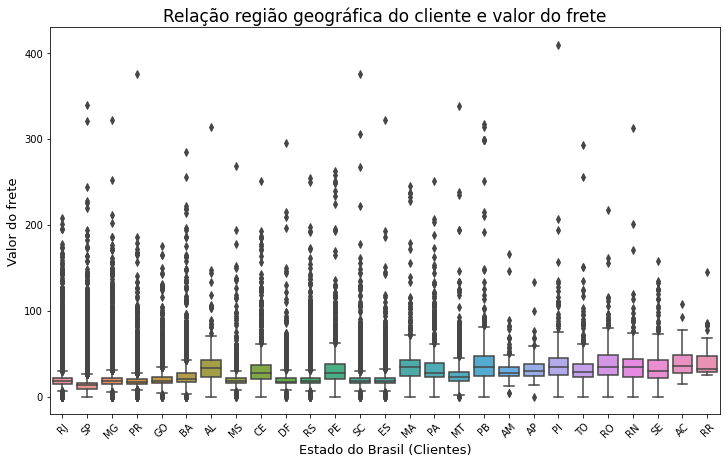

In [ ]:
plt.figure(figsize=(12,5))
freight_customer = sns.boxplot(x='customer_state', y='freight_value', 
                 data=df_orders[df_orders['price'] != -1])
freight_customer.set_title("Relação região geográfica do cliente e valor do frete", fontsize=17)
freight_customer.set_xlabel("Estado do Brasil (Clientes)", fontsize=13)
freight_customer.set_ylabel("Valor do frete", fontsize=13)
freight_customer.set_xticklabels(freight_customer.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 1.2)

plt.show()

A partir da visualização do boxplot anterior, é possível observar que há um aumento no valor do frete principalmente nas regiões nordeste e norte do Brasil. O que vai de encontro com os resultados das análises anteriores, que demonstram que há uma maior concentração de vendedores nas regiões sudeste e sul, e isso acaba por gerar aumento no valor do frete para os clientes.

In [ ]:
transaction_value=pd.DataFrame(df_orders.groupby('customer_state').agg({'price':'mean'}).sort_values(by='price',ascending=False)).reset_index()

Text(0.5, 1.0, 'Preço médio dos produtos por região brasileira')

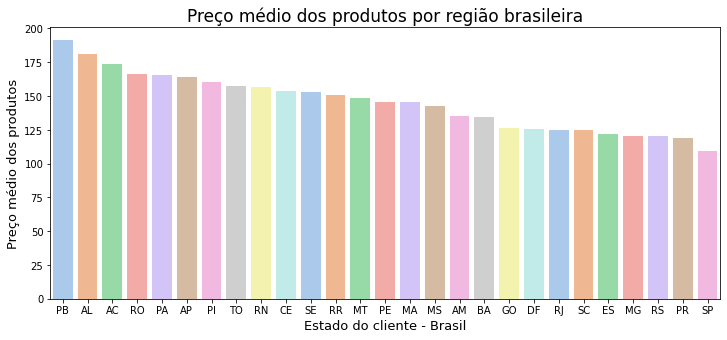

In [ ]:
#Análise do preço médio dos produtos por região brasileira, utilizando dados como: price e customer_state
plt.figure(figsize=(12,5))
price_state = sns.barplot(x='customer_state', y='price', data=transaction_value, palette=sns.color_palette(palette='pastel'))
price_state.set_xlabel('Estado do cliente - Brasil', fontsize=13)

price_state.set_ylabel('Preço médio dos produtos', fontsize=13)
price_state.set_title('Preço médio dos produtos por região brasileira', fontsize=17)


E esse aumento no valor do frete acaba impactando o preço médio dos produtos para os clientes, visto que as regiões Nordeste e Norte também apresentam comportamento de aumento de preço médio do produto, não apenas do frete.

Text(0.5, 1.0, 'Relação preço do produto e frete por Estado brasileiro')

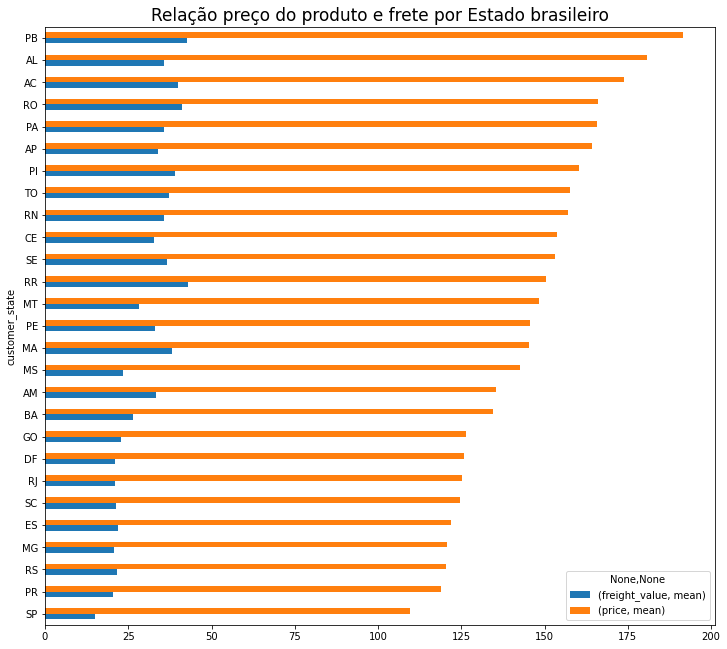

In [ ]:
state_values = pd.DataFrame(df_orders.groupby('customer_state')[['price', 'freight_value']]
                             .agg({'freight_value': ['mean'], 'price':['mean']})
                ).sort_values(by=('price','mean'))
                 
state_values.plot.barh(figsize=(12,11)).set_title('Relação preço do produto e frete por Estado brasileiro', fontsize=17)


**Todas essas análises demostram como o frete acaba impactando no preço do pedido final via e-commerce e como é importante a geração de etiquetas de fretes com descontos a fim de não perder clientes de regiões mais afastadas da maior concentração de vendedores.**